# Group Project Report
### Group 19: Aidan Gallant, Alex Hachey, Cailey Murad, Caroline Ruus

## How Past Grades, Study Habits, and Absences Correlate to Final Math Grades

## Introduction:

Students in today's society place a great importance upon their school grades, which is why we have decided to focus our project on finding the most effective predictors of success and answering the question: to what extent does a student’s past math grades, recorded absences, and study habits correlate to their final grade? In order to answer our predictive question, we will be using a Student Performance Dataset that measures the achievement of students in two Portuguese secondary schools based on each student’s response to a survey as well as their grades in Mathematics. The survey gathered information on the students’ study time, absences, as well as many other variables. It is also noted that this dataset was modeled using binary classification and regression.

## Methods & Results:
- describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
- note: all tables and figure should have a figure/table number and a legend

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
# load data from the original source on the web

temp <- tempfile()
temp2 <- tempfile()

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
download.file(url, temp)

unzip(zipfile = temp, exdir = temp2)

student <- read_csv2(file.path(temp2, "student-mat.csv"))
unlink(c(temp, temp2))

student

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,M,21,R,GT3,T,1,1,other,other,⋯,5,5,3,3,3,3,3,10,8,7
MS,M,18,R,LE3,T,3,2,services,other,⋯,4,4,1,3,4,5,0,11,12,10
MS,M,19,U,LE3,T,1,1,other,at_home,⋯,3,2,3,3,3,5,5,8,9,9


In [6]:
# wrangle and clean the data from it's original (downloaded) format to the format necessary for the planned analysis

student <- student %>%
    as_tibble() %>%
    select (studytime, absences, G1, G2, G3)

student

studytime,absences,G1,G2,G3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,6,5,6,6
2,4,5,5,6
2,10,7,8,10
⋮,⋮,⋮,⋮,⋮
1,3,10,8,7
1,0,11,12,10
1,5,8,9,9


In [5]:
# perform a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 

# train the data
student_split <- initial_split(student, prop = 0.75, strata = G3)  
student_train <- training(student_split)
student_test <- testing(student_split)

student_train

# summarize the training data set
summary(student_train)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,M,17,U,LE3,T,3,1,services,services,⋯,2,4,5,3,4,2,3,14,16,16
MS,M,21,R,GT3,T,1,1,other,other,⋯,5,5,3,3,3,3,3,10,8,7
MS,M,18,R,LE3,T,3,2,services,other,⋯,4,4,1,3,4,5,0,11,12,10


    school              sex                 age          address         
 Length:298         Length:298         Min.   :15.00   Length:298        
 Class :character   Class :character   1st Qu.:16.00   Class :character  
 Mode  :character   Mode  :character   Median :17.00   Mode  :character  
                                       Mean   :16.68                     
                                       3rd Qu.:18.00                     
                                       Max.   :22.00                     
   famsize            Pstatus               Medu            Fedu      
 Length:298         Length:298         Min.   :0.000   Min.   :1.000  
 Class :character   Class :character   1st Qu.:2.000   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :3.000   Median :3.000  
                                       Mean   :2.772   Mean   :2.557  
                                       3rd Qu.:4.000   3rd Qu.:3.750  
                                       Max.   :4.000   M

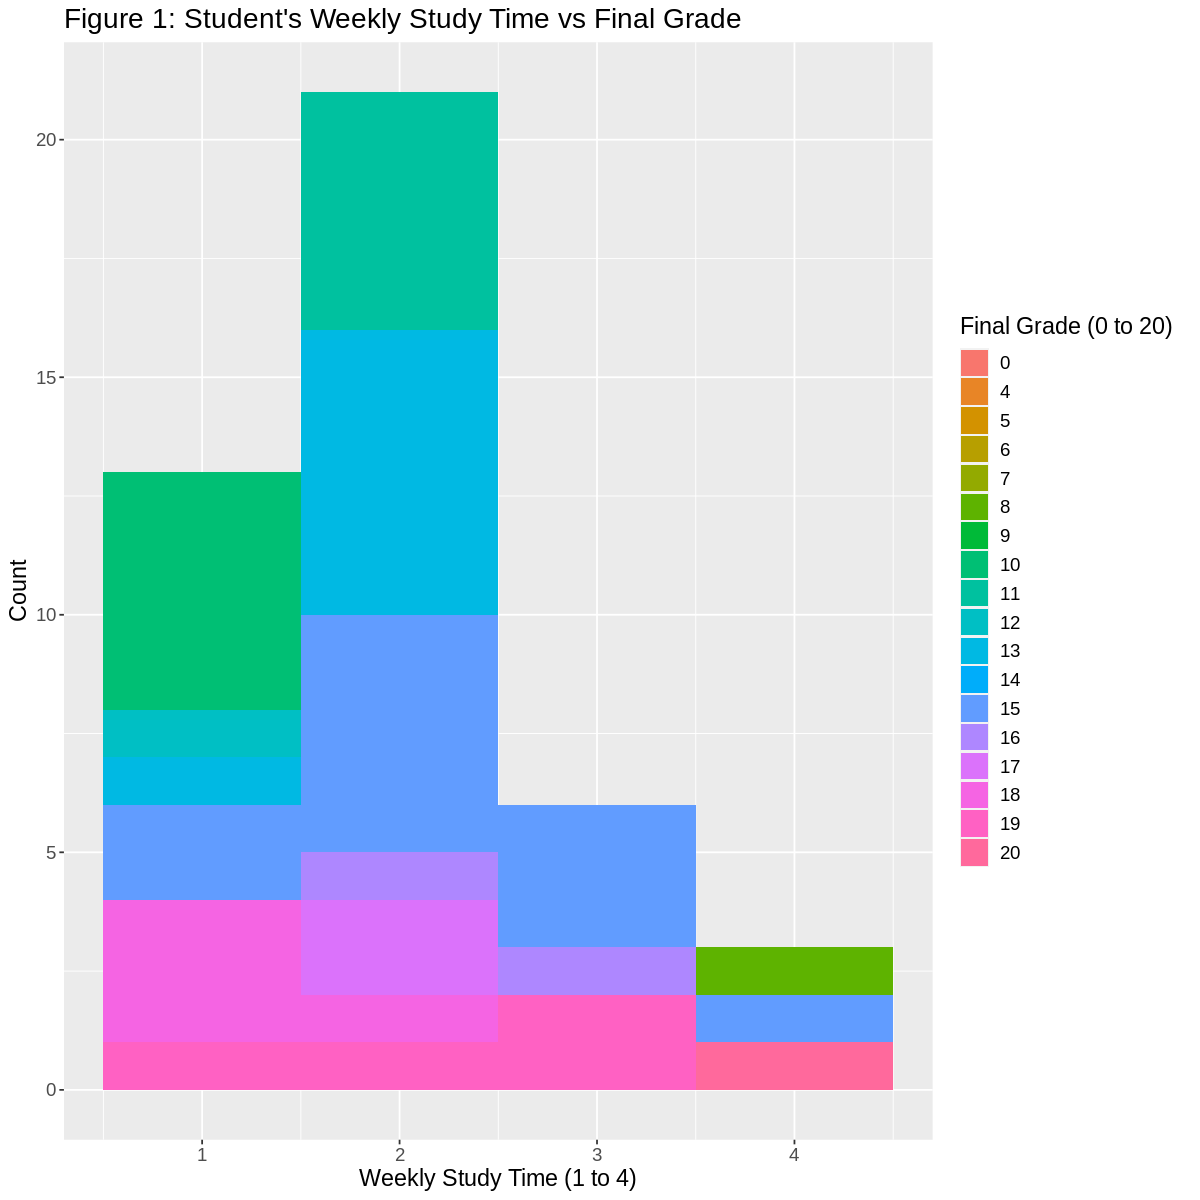

In [5]:
# create a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis

options(repr.plot.width = 10, repr.plot.height = 10)

studytime_plot <- student_train %>%
    ggplot(aes(x = studytime, fill = as_factor(G3))) +
    geom_histogram(position = "identity", binwidth = 1) +
    labs(x = "Weekly Study Time (1 to 4)", y = "Count", fill = "Final Grade (0 to 20)") +
    ggtitle("Figure 1: Student's Weekly Study Time vs Final Grade") +
    theme(text = element_text(size = 14))

studytime_plot

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

absences_plot <- student_train %>%
    ggplot(aes(x = absences, fill = as_factor(G3))) +
    geom_histogram(position = "identity", binwidth = 1) +
    labs(x = "Number of School Absences (0 to 93)", y = "Count", fill = "Final Grade (0 to 20)") +
    ggtitle("Figure 2: Student's Number of School Absences vs Final Grade") +
    theme(text = element_text(size = 14)) #+
    #coord_flip()

absences_plot

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)

G1_plot <- student_train %>%
    ggplot(aes(x = G1, fill = as_factor (G3))) +
    geom_histogram(position = "identity", binwidth = 1) +
    labs(x = "First Period Grade (0 to 20)", y = "Count", fill = "Final Grade (0 to 20)") +
    ggtitle("Figure 3: Distribution of Student's First Period Grade") +
    theme(text = element_text(size = 14))

G1_plot

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)

G2_plot <- student_train %>%
    ggplot(aes(x = G2, fill = as_factor (G3))) +
    geom_histogram(position = "identity", binwidth = 1) +
    labs(x = "Second Period Grade (0 to 20)", y = "Count", fill = "Final Grade (0 to 20)") +
    ggtitle("Figure 4: Distribution of Second Period Grade") +
    theme(text = element_text(size = 14))

G2_plot

In [ ]:
# perform the data analysis

# !!!
# knn-regression with G1 as predictor

# set the seed
set.seed(1)

# create recipe to preprocess data
student_recipe <- recipe(G3 ~ G1, data = student_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

# model specification
student_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("regression")

# 10-fold cross validation object
student_vfold <- vfold_cv(student_train, v = 10, strata = G3)

student_workflow <- workflow() %>%
    add_recipe(student_recipe) %>%
    add_model(student_spec)

student_workflow

# run cross validation for a grid of numbers of neighbors ranging from 1 to 200
gridvals <- tibble(neighbors = seq(1:200))

# tune the model and return the RMSPE for each number of neighbor
student_results <- student_workflow %>%
    tune_grid(resamples = student_vfold, grid = gridvals) %>%
    collect_metrics()

# find the minimum RMSPE
student_min <- student_results %>%
    filter(.metric == "rmse") %>%
    filter(mean == min(mean))

# retrain model on training data using K value with smallest RMSPE
k_min <- student_min %>%
    pull(neighbors)

student_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
    set_engine("kknn") %>%
    set_mode("regression")

student_best_fit <- workflow() %>%
    add_recipe(student_recipe) %>%
    add_model(student_best_spec) %>%
    fit(data = student_train)

# assess RMSPE of test data predictions
student_summary <- student_best_fit %>%
    predict(student_test) %>%
    bind_cols(student_test) %>%
    metrics(truth = G3, estimate = .pred) %>%
    filter (.metric == "rmse")

paste0("The lowest RMSPE is ", 
      student_summary %>%
      pull(.estimate))

# create a visualization of the analysis
student_preds <- student_best_fit %>%
    predict(student_train) %>%
    bind_cols(student_train)

student_plot <- ggplot(student_preds, aes(x = G1, y = G3)) +
    geom_point() +
    geom_line(data = student_preds, mapping = aes(x = G1, y = .pred), colour = "blue") +
    labs(x = "First Period Grade (0 to 20)", y = "Final Grade (0 to 20)") +
    theme(text = element_text(size = 14)) +
    ggtitle(paste0("Figure 5: \n KNN-Regression of First Period Grade and Final Grade \n (K = ", k_min, ")"))

student_plot

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


`geom_smooth()` using formula 'y ~ x'



[1] "The lowest RMSPE is 2.92485452979169"

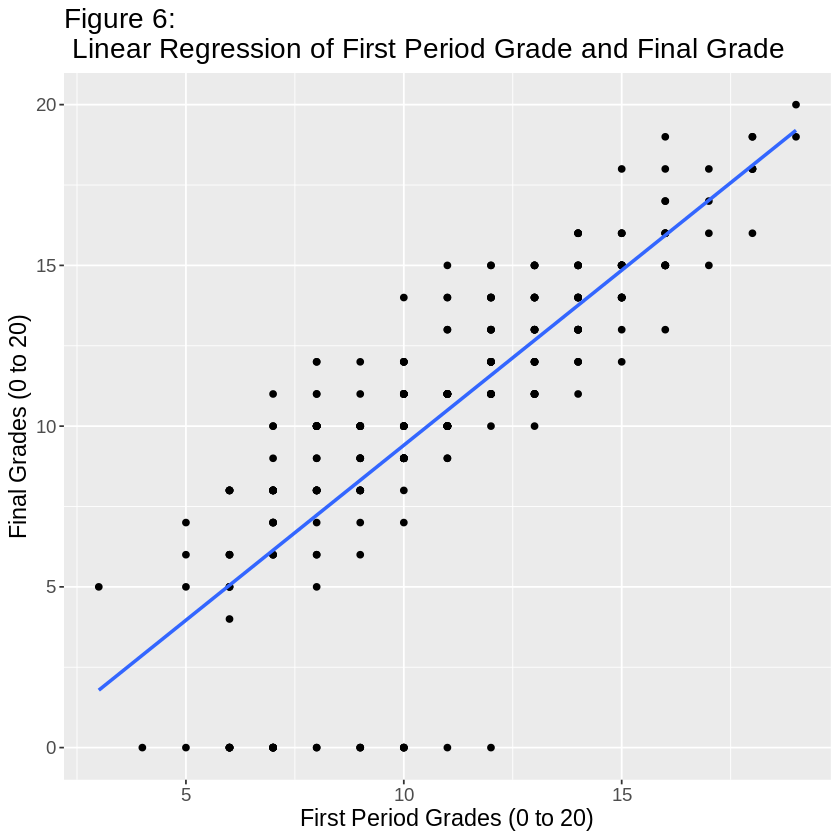

In [21]:
# linear-regression with G1 as predictor

# set the seed
set.seed(1)

# model specification
student_spec <- linear_reg() %>% 
       set_engine("lm") %>%
       set_mode("regression")

# create recipe to preprocess data
student_recipe <- recipe(G3 ~ G1, data = student_train)
 
# establish workflow
student_fit <- workflow() %>%
       add_recipe(student_recipe) %>%
       add_model(student_spec) %>%
       fit(data = student_train)

#student_fit
 
# visualize model predictions
G1_linear_plot <- ggplot(student_train, aes(x = G1, y = G3)) +
    geom_point() +
    labs(x = "First Period Grades (0 to 20)", y = "Final Grades (0 to 20)") +
    theme(text = element_text(size = 14)) +
    ggtitle("Figure 6: \n Linear Regression of First Period Grade and Final Grade") +
    geom_smooth(method = "lm", se = FALSE)

G1_linear_plot
 
# calculate RMSE of best fit line on training data
lm_test_results <- student_fit %>%
         predict(student_test) %>%
         bind_cols(student_test) %>%
         metrics(truth = G3, estimate = .pred)

#lm_test_results
 
# calculate RMSPE using test data
lm_rmspe <- lm_test_results %>%
          filter(.metric == "rmse") %>%
          select(.estimate) %>%
          pull()

paste0("The lowest RMSPE is ", lm_rmspe)

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


[1] "The lowest RMSPE is 2.7668053623166"

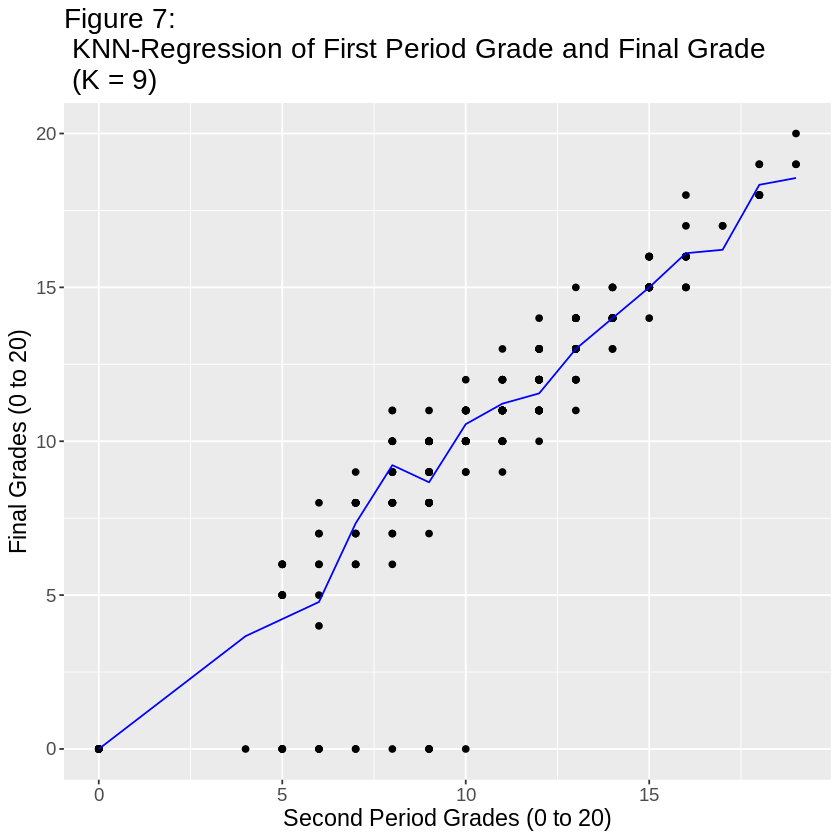

In [17]:
# !!!
# knn-regression with G2 as predictor

# set the seed
set.seed(1)

# create recipe to preprocess data
student_recipe <- recipe(G3 ~ G2, data = student_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

# model specification
student_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("regression")

# 10-fold cross validation object
student_vfold <- vfold_cv(student_train, v = 10, strata = G3)

student_workflow <- workflow() %>%
    add_recipe(student_recipe) %>%
    add_model(student_spec)

student_workflow

# run cross validation for a grid of numbers of neighbors ranging from 1 to 200
gridvals <- tibble(neighbors = seq(1:200))

# tune the model and return the RMSPE for each number of neighbor
student_results <- student_workflow %>%
    tune_grid(resamples = student_vfold, grid = gridvals) %>%
    collect_metrics()

# find the minimum RMSPE
student_min <- student_results %>%
    filter(.metric == "rmse") %>%
    filter(mean == min(mean))

# retrain model on training data using K value with smallest RMSE
k_min <- student_min %>%
    pull(neighbors)

student_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
    set_engine("kknn") %>%
    set_mode("regression")

student_best_fit <- workflow() %>%
    add_recipe(student_recipe) %>%
    add_model(student_best_spec) %>%
    fit(data = student_train)

# assess RMSPE of test data predictions
student_summary <- student_best_fit %>%
    predict(student_test) %>%
    bind_cols(student_test) %>%
    metrics(truth = G3, estimate = .pred) %>%
    filter(.metric == "rmse")

paste0("The lowest RMSPE is ", 
      student_summary %>%
      pull(.estimate))

# create a visualization of the analysis 
student_preds <- student_best_fit %>%
    predict(student_train) %>%
    bind_cols(student_train)

G2_plot <- ggplot(student_preds, aes(x = G2, y = G3)) +
    geom_point() +
    geom_line(data = student_preds, mapping = aes(x = G2, y = .pred), colour = "blue") +
    labs(x = "Second Period Grades (0 to 20)", y = "Final Grades (0 to 20)") +
    theme(text = element_text(size = 14)) +
    ggtitle(paste0("Figure 7: \n KNN-Regression of First Period Grade and Final Grade \n (K = ", k_min, ")"))
G2_plot

`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.4852008
rsq,standard,0.7685109
mae,standard,1.2492271


[1] "The lowest RMSPE is 2.48520075149628"

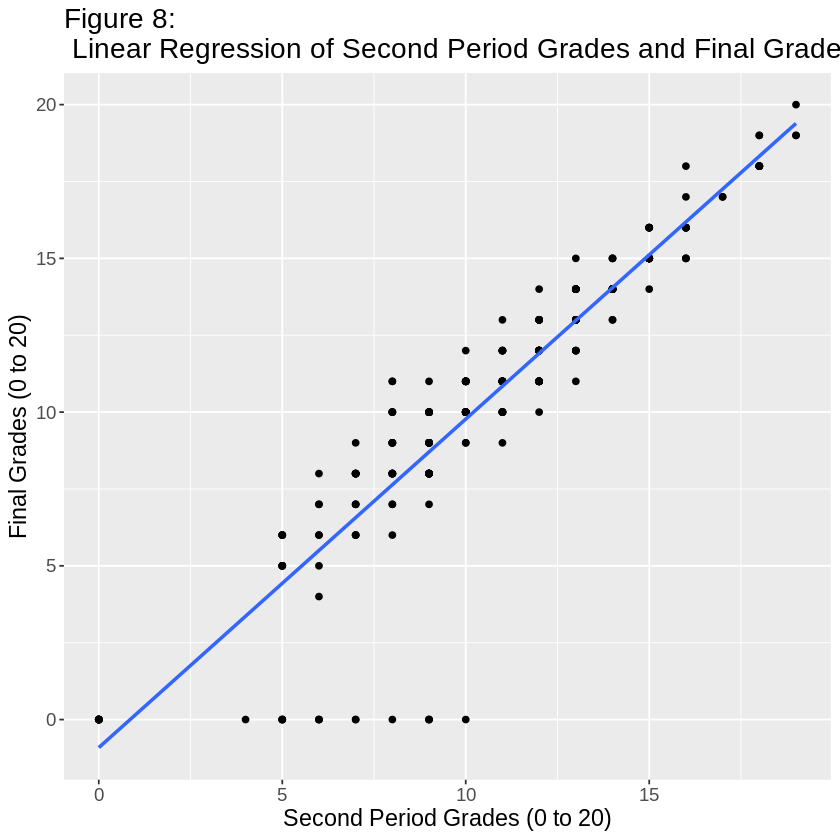

In [18]:
# linear regression with G2 as predictor
 
# set the seed
set.seed(1)

# model specification
student_spec <- linear_reg() %>% 
       set_engine("lm") %>%
       set_mode("regression")

# create recipe to preprocess data
student_recipe <- recipe(G3 ~ G2, data = student_train)
 
# establish Workflow
student_fit <- workflow() %>%
       add_recipe(student_recipe) %>%
       add_model(student_spec) %>%
       fit(data = student_train)
 
# visualize model predictions
G2_linear_plot <- ggplot(student_train, aes(x = G2, y = G3)) +
    geom_point() +
    labs(x= "Second Period Grades (0 to 20)", y = "Final Grades (0 to 20)") +
    theme(text = element_text(size = 14)) +
    ggtitle("Figure 8: \n Linear Regression of Second Period Grades and Final Grades") +
    geom_smooth(method = "lm", se = FALSE)

G2_linear_plot
 
# calculate RMSE of best fit line on training data
lm_test_results <- student_fit %>%
         predict(student_test) %>%
         bind_cols(student_test) %>%
         metrics(truth = G3, estimate = .pred)

lm_test_results

# calculate RMSPE using test data:
lm_rmspe <- lm_test_results %>%
          filter(.metric == "rmse") %>%
          select(.estimate) %>%
          pull()

paste0("The lowest RMSPE is ", lm_rmspe)

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


[1] "The lowest RMSPE is 4.91105375806779"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4.911054


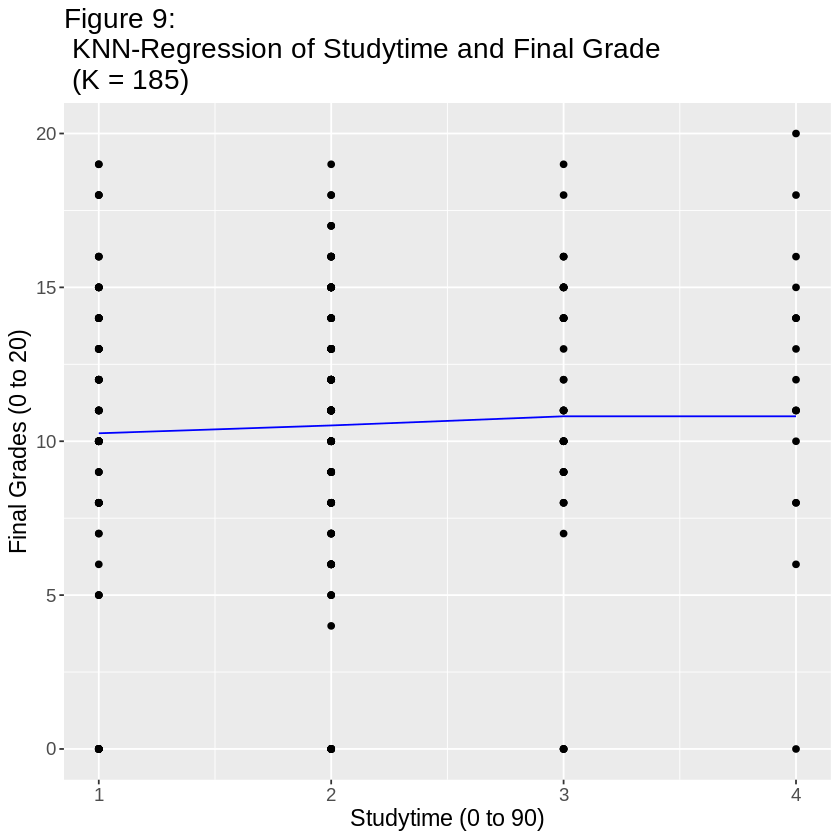

In [19]:
# knn-regression with studytime as predictor

# set the seed
set.seed(1)
 
# perform the data analysis
 
# create recipe to preprocess data
student_recipe <- recipe(G3 ~ studytime, data = student_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
 
# model specification
student_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("regression")
 
# 10-fold cross validation object
student_vfold <- vfold_cv(student_train, v = 10, strata = G3)
 
student_workflow <- workflow() %>%
    add_recipe(student_recipe) %>%
    add_model(student_spec)
 
student_workflow
 
# run cross validation for a grid of numbers of neighbors ranging from 1 to 200
gridvals <- tibble(neighbors = seq(1:200))
 
# tune the model and return the RMSPE for each number of neighbor
student_results <- student_workflow %>%
    tune_grid(resamples = student_vfold, grid = gridvals) %>%
    collect_metrics()
 
# find the minimum RMSPE
student_min <- student_results %>%
    filter(.metric == "rmse") %>%
    filter(mean == min(mean))
    #arrange(desc (mean, std_error)) %>%
    #slice (200)
 
# retrain model on training data using K value with smallest RMSE
k_min <- student_min %>%
    pull(neighbors)
 
student_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
    set_engine("kknn") %>%
    set_mode("regression")
 
student_best_fit <- workflow() %>%
    add_recipe(student_recipe) %>%
    add_model(student_best_spec) %>%
    fit(data = student_train)
 
# assess RMSPE of test data predictions
student_summary <- student_best_fit %>%
    predict(student_test) %>%
    bind_cols(student_test) %>%
    metrics(truth = G3, estimate = .pred) %>%
    filter(.metric == "rmse")

paste0("The lowest RMSPE is ", 
      student_summary %>%
      pull(.estimate))
 
student_summary
 
# create a visualization of the analysis
student_preds <- student_best_fit %>%
    predict(student_train) %>%
    bind_cols(student_train)

studytime_plot <- ggplot(student_preds, aes(x = studytime, y = G3)) +
    geom_point() +
    geom_line(data = student_preds, mapping = aes(x = studytime, y = .pred), colour = "blue") +
    labs(x = "Studytime (0 to 90)", y = "Final Grades (0 to 20)") +
    theme(text = element_text(size = 14)) +
    ggtitle(paste0("Figure 9: \n KNN-Regression of Studytime and Final Grade \n (K = ", k_min, ")"))

studytime_plot

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


[1] "The lowest RMSPE is 4.6138733664317"

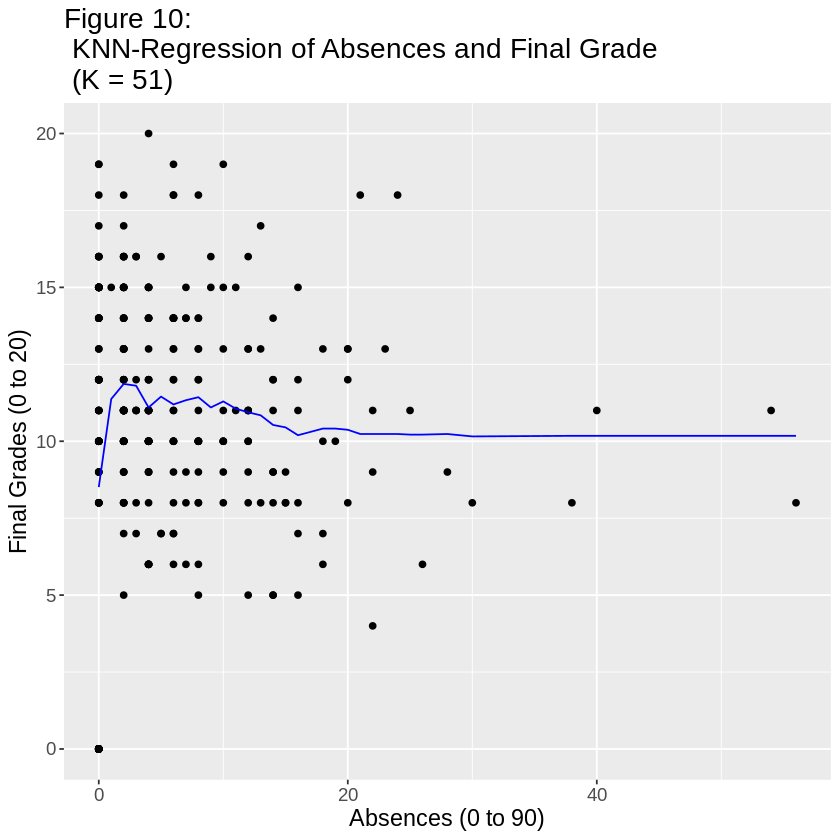

In [20]:
# knn-regression with absences as a predictor
 
# set the seed
set.seed(1)
 
# perform the data analysis
 
# create recipe to preprocess data
student_recipe <- recipe(G3 ~ absences, data = student_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
 
# model specification
student_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("regression")
 
# 10-fold cross validation object
student_vfold <- vfold_cv(student_train, v = 10, strata = G3)
 
student_workflow <- workflow() %>%
    add_recipe(student_recipe) %>%
    add_model(student_spec)
 
student_workflow
 
# run cross validation for a grid of numbers of neighbors ranging from 1 to 200
gridvals <- tibble(neighbors = seq(1:200))
 
# tune the model and return the RMSPE for each number of neighbor
student_results <- student_workflow %>%
    tune_grid(resamples = student_vfold, grid = gridvals) %>%
    collect_metrics()
 
# find the minimum RMSPE
student_min <- student_results %>%
    filter(.metric == "rmse") %>%
    filter(mean == min(mean))
    #arrange(desc (mean, std_error)) %>%
    #slice (200)
 
# retrain model on training data using K value with smallest RMSE
k_min <- student_min %>%
    pull(neighbors)
 
student_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
    set_engine("kknn") %>%
    set_mode("regression")
 
student_best_fit <- workflow() %>%
    add_recipe(student_recipe) %>%
    add_model(student_best_spec) %>%
    fit(data = student_train)
 
# assess RMSPE of test data predictions
student_summary <- student_best_fit %>%
    predict(student_test) %>%
    bind_cols(student_test) %>%
    metrics(truth = G3, estimate = .pred) %>%
    filter(.metric == "rmse")

paste0("The lowest RMSPE is ", 
      student_summary %>%
      pull(.estimate))
 
# create a visualization of the analysis
student_preds <- student_best_fit %>%
    predict(student_train) %>%
    bind_cols(student_train)
 
absences_plot <- ggplot(student_preds, aes(x = absences, y = G3)) +
    geom_point() +
    geom_line(data = student_preds, mapping = aes(x = absences, y = .pred), colour = "blue") +
    labs(x = "Absences (0 to 90)", y = "Final Grades (0 to 20)") +
    theme(text = element_text(size = 14)) +
    ggtitle(paste0("Figure 10: \n KNN-Regression of Absences and Final Grade \n (K = ", k_min, ")"))

absences_plot

## Discussion:
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

## References
- At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
- Make sure to cite the source of your data as well.